First we'll generate an urba-rural layer, an areas grid, a population grid, and then calculate a density from the latter two:

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
urbanRural = np.random.randint(0,3,(10,10))
print urbanRural

[[2 2 0 2 0 2 2 2 1 1]
 [0 1 2 2 1 0 2 2 0 2]
 [1 0 0 0 0 1 0 1 2 2]
 [1 0 1 2 1 0 1 2 0 1]
 [0 2 2 0 2 0 0 1 0 2]
 [2 2 0 1 0 0 2 0 2 1]
 [2 0 1 1 1 1 0 1 2 0]
 [1 0 0 2 2 0 0 2 1 1]
 [2 1 1 0 1 1 2 1 2 1]
 [1 2 1 0 1 0 2 1 1 1]]


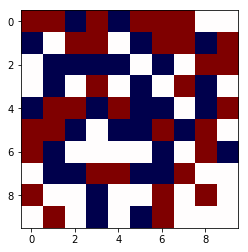

In [5]:
plt.imshow(urbanRural, cmap="seismic")
plt.show()

In [19]:
# make exegarrated areas grid:
r = np.array([0.1,0.2,0.3,0.4,0.5,0.5,0.4,0.3,0.2,0.1])
c = np.array([1,1,1,1,1,1,1,1,1,1])
areas = np.outer(r,c)
print areas

[[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2]
 [ 0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3]
 [ 0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4]
 [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
 [ 0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4]
 [ 0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3]
 [ 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]


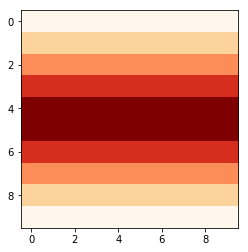

In [20]:
plt.imshow(areas, cmap="OrRd")
plt.show()

In [22]:
# make a random population grid
population = np.random.randint(0,100,(10,10))
population[urbanRural == 0] = 0
print population

[[24 65  0 97  0 54 28  1  4 57]
 [ 0 33 91  4 44  0 91 46  0 99]
 [77  0  0  0  0 59  0 82 62 22]
 [11  0 32 14  6  0 95 61  0 70]
 [ 0 81 96  0 83  0  0 65  0 14]
 [25 56  0 10  0  0 51  0 87 68]
 [56  0 38 21 52 73  0 59 22  0]
 [40  0  0 43 59  0  0 43 55 65]
 [51 61 54  0 29 61 16 48 87 54]
 [37 34 19  0 69  0 27 97 78 95]]


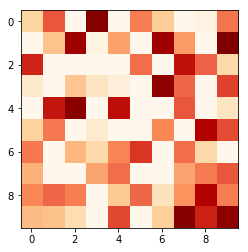

In [25]:
plt.imshow(population, cmap="OrRd")
plt.show()

In [26]:
densities = np.divide(population, areas)
print densities

[[ 240.          650.            0.          970.            0.          540.
   280.           10.           40.          570.        ]
 [   0.          165.          455.           20.          220.            0.
   455.          230.            0.          495.        ]
 [ 256.66666667    0.            0.            0.            0.
   196.66666667    0.          273.33333333  206.66666667   73.33333333]
 [  27.5           0.           80.           35.           15.            0.
   237.5         152.5           0.          175.        ]
 [   0.          162.          192.            0.          166.            0.
     0.          130.            0.           28.        ]
 [  50.          112.            0.           20.            0.            0.
   102.            0.          174.          136.        ]
 [ 140.            0.           95.           52.5         130.          182.5
     0.          147.5          55.            0.        ]
 [ 133.33333333    0.            0.     

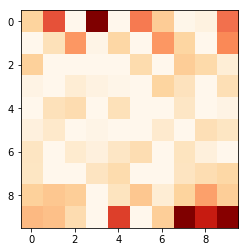

In [27]:
plt.imshow(densities, cmap="OrRd")
plt.show()

Now we're ready to go. Next, we'll calculate the density limit at which we begin to spill over. For that, we need a thinning factor, which is used to simulate urban areas getting less dense over time, and the number of cells we take into account to calculate the threshold. In the actual script, the number will be higher (e.g., 50), but we'll go with 3 here. 

In [29]:
# Factor to simulate densities in the highest density areas going down.
thinningFactor = 0.95
topNcells = 3

ruralCell = 1
urbanCell = 2

# copied from PopFuntions.py
def getTopNCells(N, arrrray):

    """Returns the highest N values from an array"""

    p = np.partition(-arrrray, N)
    pp = -p[:N]

    return pp

Now we calculate the limit from that:

In [32]:
urbanDensities = densities[urbanRural == urbanCell]

print urbanDensities

[ 240.          650.          970.          540.          280.           10.
  455.           20.          455.          230.          495.
  206.66666667   73.33333333   35.          152.5         162.          192.
  166.           28.           50.          112.          102.          174.
  140.           55.          143.33333333  196.66666667  143.33333333
  255.           80.          435.          340.          270.        ]


Let's get the N densest cells (covering cases with few or no urban calls in a country):

In [34]:
if urbanDensities.size > 0:
    if urbanDensities.size >= topNcells:  # this is the common case
        topN = getTopNCells(topNcells, urbanDensities)
    # this catches countries which have urban cells, b ut very few
    # (not sure this is actually an issue, just in case)
    else:
        topN = urbanDensities
else:  # if there are no urban cells, 
    # take any cells in the densities raster:
    topN = densities

    
print topN

[ 540.  650.  970.]


Now we can calculate the limit:

In [36]:
# we'll use the mean of the top n cells of each country as the
# maximum
mx = np.nansum(topN) / topN.size
# ... considering the thinning factor
limit = mx * thinningFactor

print limit

684.0


Next, we'll select all cells where the density is above the limit:

In [37]:
aboveLimit = densities > limit


[[False False False  True False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False  True False False  True  True  True]]


For those cells, we need to know how many people they can hold without exceeding the density limit. To calculate that, we just multiply the density limit with the area of the corresponding cell, this will give us the number of people that cell can hold without going over the density limit.

We'll calculate the total number of people